# Data Cleaning

### Importing Libraries

In [ ]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
from datetime import datetime
import glob
import os
import json
import pickle
import six
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None


###  Importing all CSV files

In [2]:
path = '/Users/amolverma/Downloads/archive (8)'
extension = 'csv'
os.chdir('/Users/amolverma/Downloads/archive (8)')
result = glob.glob('*.{}'.format('csv'))
print(result)

['CA_youtube_trending_data.csv', 'GB_youtube_trending_data.csv', 'IN_youtube_trending_data.csv', 'RU_youtube_trending_data.csv', 'BR_youtube_trending_data.csv', 'KR_youtube_trending_data.csv', 'US_youtube_trending_data.csv', 'MX_youtube_trending_data.csv', 'JP_youtube_trending_data.csv', 'DE_youtube_trending_data.csv', 'FR_youtube_trending_data.csv']


###  Reading all CSV Files

In [3]:
all_dataframes = [] # list to store each data frame separately
for csv in result:
    df = pd.read_csv(csv)
    df['country'] = csv[0:2] # adding column 'country' so that each dataset could be identified uniquely
    all_dataframes.append(df)
all_dataframes[0].head() # index 0 to 9 for [CA, DE, FR, GB, IN, JP, KR, MX, RU, US] datasets

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
0,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296541,6180,30059,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...,CA
1,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353797,2628,40222,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,CA
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146740,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",CA
3,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156914,5857,35331,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,CA
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45803,964,2198,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,CA


### Fixing Datatypes

In [4]:
for df in all_dataframes:
    # video_id 
    df['video_id'] = df['video_id'].astype('str') 
    
    # trending date 
    df['trending_date'] = df['trending_date'].astype('str') 
    date_pieces = (df['trending_date']
                   .str.split('T')
                  )
    df['DATE1'] = date_pieces.str[0].astype(str)
    df['DATE2'] = date_pieces.str[1].astype(str)   
    
    #title
    df['title'] = df['title'].astype('str')
    #channel_title
    df['channelTitle'] = df['channelTitle'].astype('str')
    #category_id
    df['categoryId'] = df['categoryId'].astype(str) 
    
    #tags
    df['tags'] = df['tags'].astype('str')
    
    # views, likes, dislikes, comment_count are already in correct data types i.e int64
    
    #thumbnail_link
    df['thumbnail_link'] = df['thumbnail_link'].astype('str') 
    
    #description
    df['description'] = df['description'].astype('str')
    
    # Changing comments_disabled, ratings_disabled, video_error_or_removed from bool to categorical
    df['comments_disabled'] = df['comments_disabled'].astype('category') 
    df['ratings_disabled'] = df['ratings_disabled'].astype('category') 
    
    # publish_time 
    df['publishedAt']=df['publishedAt'].astype('str')
    
    published_pieces=(df['publishedAt'].str.split('T'))
    
    df['Published_Date']=published_pieces.str[0].astype(str)
    df['Published_Time']=published_pieces.str[1].astype(str)
    df['Published_Date'] = pd.to_datetime(df['Published_Date'], errors='coerce', format='%Y-%m-%d')

In [5]:
# We can use any index from 0 to 9 inclusive (for each of the 10 dataframes
all_dataframes[1].dtypes

video_id                     object
title                        object
publishedAt                  object
channelId                    object
channelTitle                 object
categoryId                   object
trending_date                object
tags                         object
view_count                    int64
likes                         int64
dislikes                      int64
comment_count                 int64
thumbnail_link               object
comments_disabled          category
ratings_disabled           category
description                  object
country                      object
DATE1                        object
DATE2                        object
Published_Date       datetime64[ns]
Published_Time               object
dtype: object

In [6]:
for df in all_dataframes:
    df.set_index('video_id', inplace=True)

### Examining Missing Values

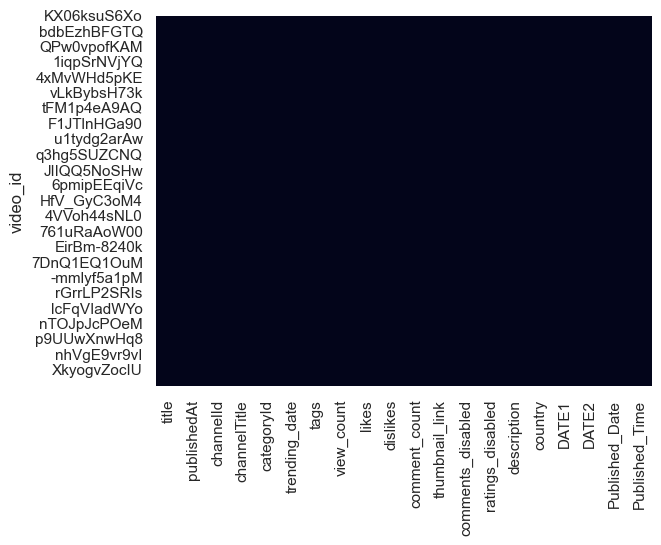

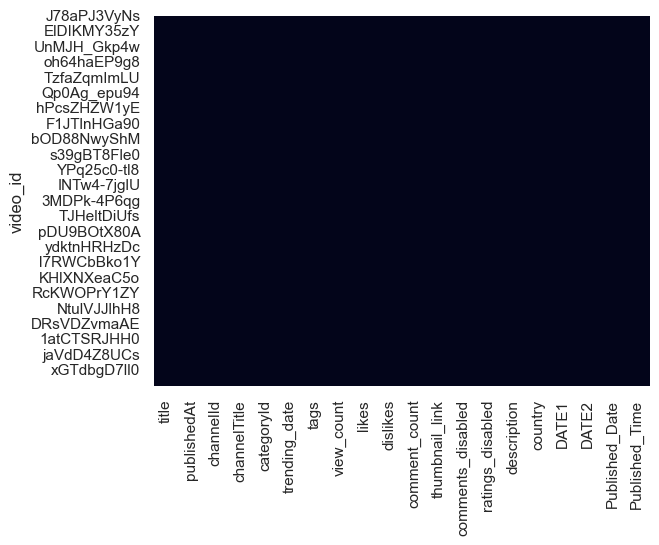

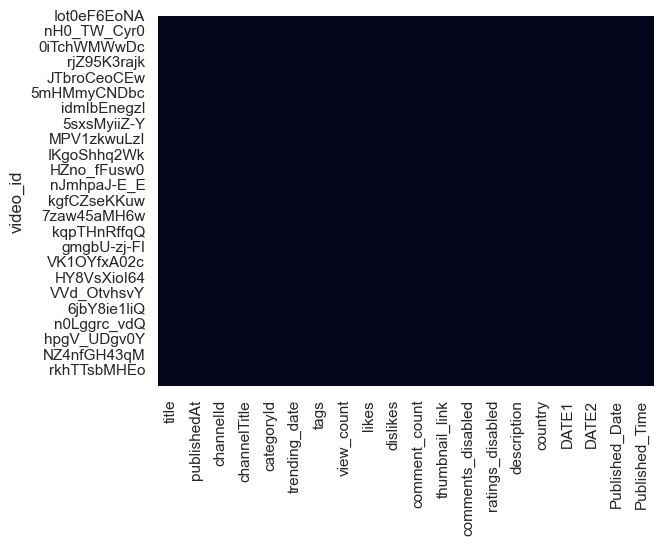

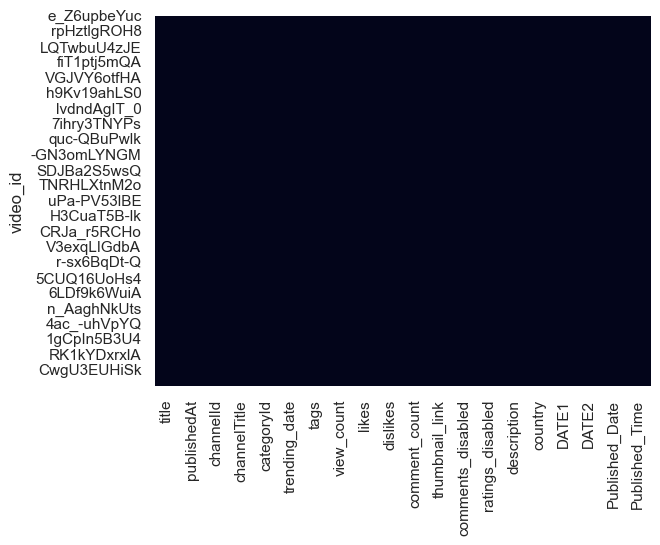

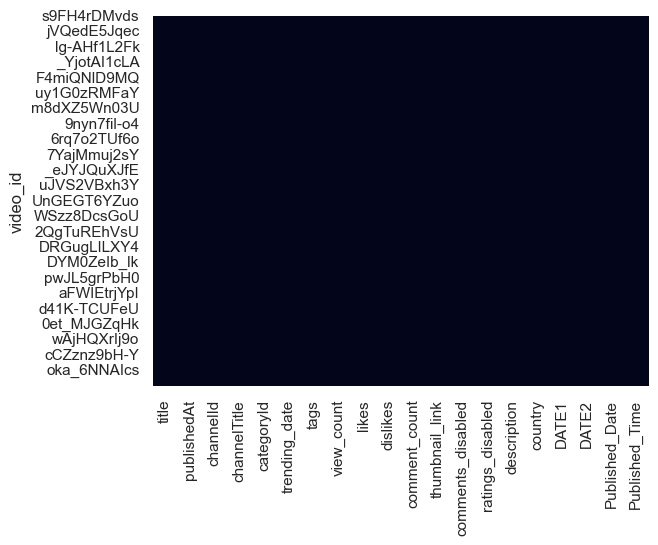

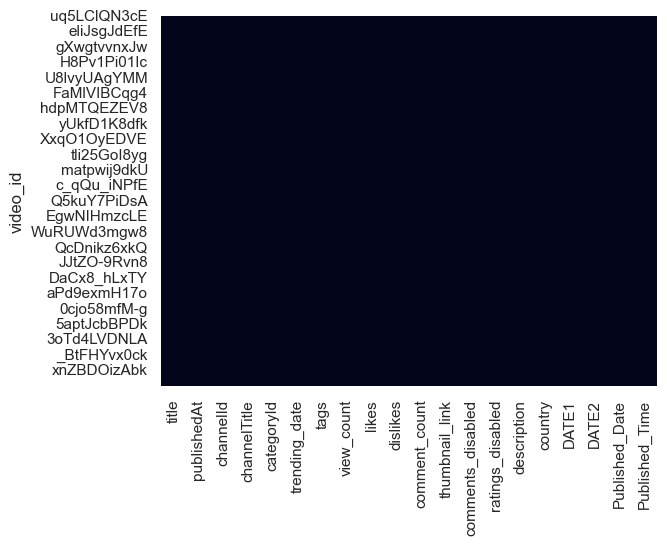

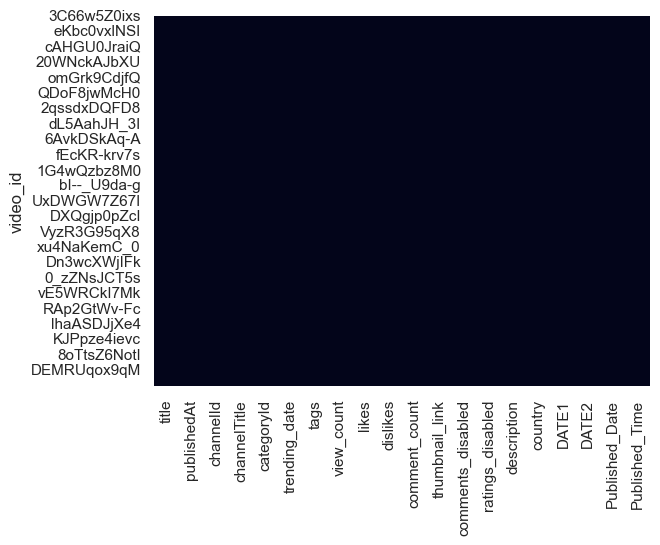

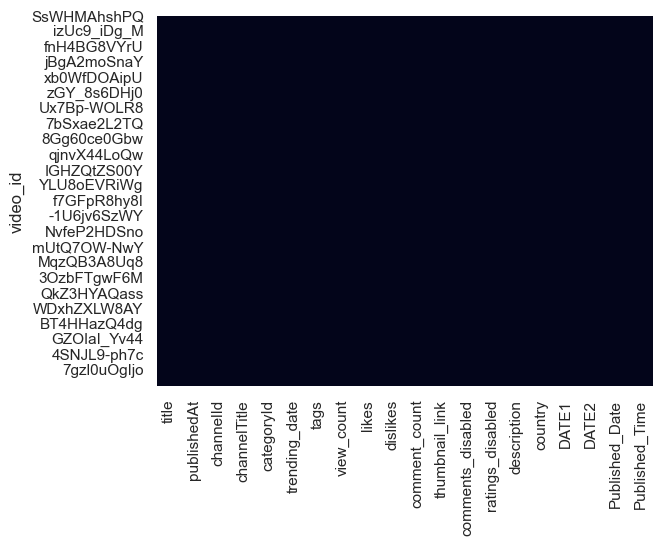

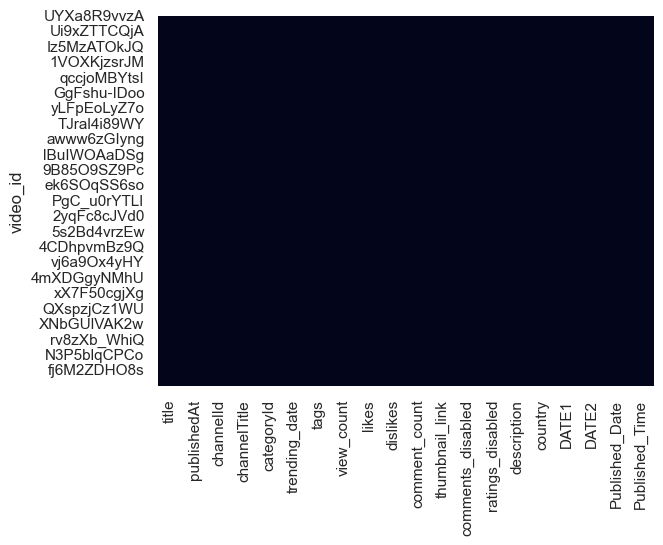

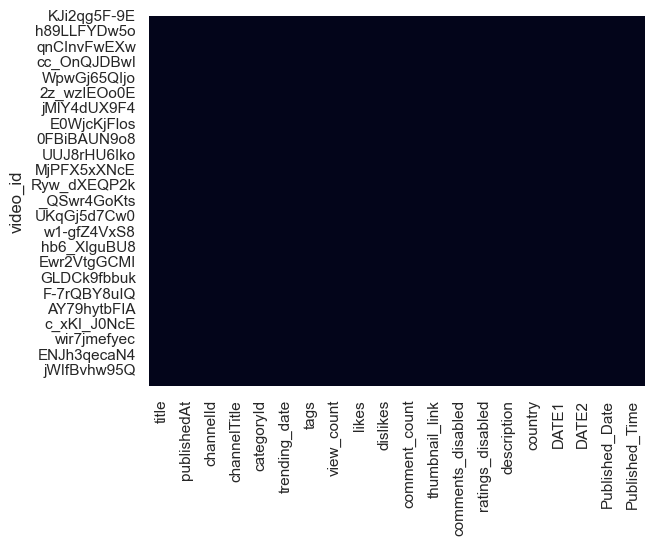

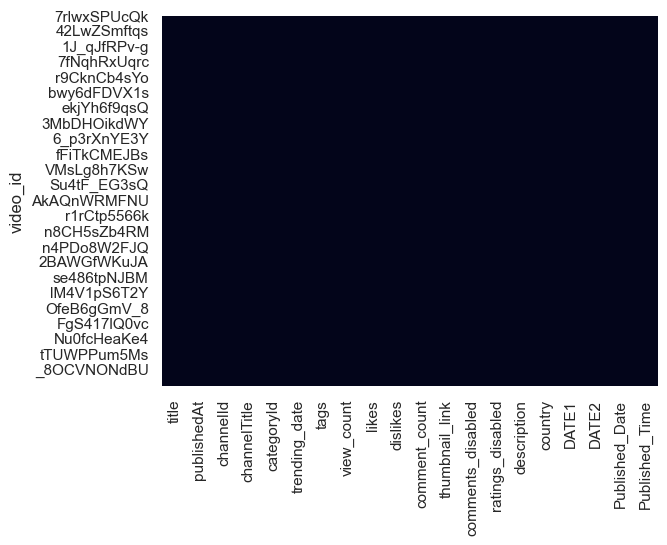

<Figure size 640x480 with 0 Axes>

In [7]:
for df in all_dataframes:
    sns.heatmap(df.isnull(), cbar=False)
    plt.figure()

### Combining Every Dataframe Into One Huge Dataframe


In [10]:
combined_df = pd.concat(all_dataframes)

In [13]:
# Making copy of original dataframe
backup_df = combined_df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')
# Sorting according to latest trending date while removing duplicates
combined_df = combined_df.reset_index().sort_values('trending_date', ascending=False).drop_duplicates('video_id',keep='first').set_index('video_id')
# Doing the same above operation for each of the individual dataframes in the list we created earlier
for df in all_dataframes:
    df = df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')
# Printing results
combined_df[['Published_Date','Published_Time','DATE1', 'country']].head()
# It can be seen that latest publications and trending information is at the top now

,Published_Date,Published_Time,DATE1,country
video_id,,,,
LAQMwlePrSA,2023-07-02,09:15:00Z,2023-07-10,FR
Qh0RSkK-s4E,2023-07-05,08:00:13Z,2023-07-10,JP
BODBvfqNWBw,2023-07-06,09:00:09Z,2023-07-10,JP
mGQiVBcJgkc,2023-07-05,11:00:38Z,2023-07-10,JP
RyPZJm9Sg2c,2023-07-05,09:00:14Z,2023-07-10,JP


In [17]:
categoryId = {}
with open('/Users/amolverma/Downloads/archive (8)/DE_category_id.json', 'r') as f:
    d = json.load(f)
    for category in d['items']:
        categoryId[category['id']] = category['snippet']['title']
combined_df.insert(2, 'category', combined_df['categoryId'].map(categoryId))
backup_df.insert(2, 'category', backup_df['categoryId'].map(categoryId))
for df in all_dataframes:
    df.insert(2, 'category', df['categoryId'].map(categoryId))
# Printing cleaned combined dataframe
combined_df.head(3)

,title,publishedAt,category,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,DATE1,DATE2,Published_Date,Published_Time
video_id,,,,,,,,,,,,,,,,,,,,,
LAQMwlePrSA,QUI SERA LE MEILLEUR INVENTEUR ? (Feat. Lorenzo),2023-07-02T09:15:00Z,Entertainment,UCo3i0nUzZjjLuM7VjAVz4zA,Michou,24,2023-07-10T00:00:00Z,michou|inventeur|lorenzo|video|meilleur|qui|sera,2626271,180148,0,3817,https://i.ytimg.com/vi/LAQMwlePrSA/default.jpg,False,False,"Salut ! Nouvelle vidéo, avec Lorenzo et Alex (...",FR,2023-07-10,00:00:00Z,2023-07-02,09:15:00Z
Qh0RSkK-s4E,Snow Man【可愛いブタちゃんと触れ合い】そこには癒し愛しかない🐷,2023-07-05T08:00:13Z,Music,UCuFPaemAaMR8R5cHzjy23dQ,Snow Man,10,2023-07-10T00:00:00Z,Snow Man|スノーマン|岩本 照|Hikaru Iwamoto|深澤 辰哉|Tatsu...,1336900,0,0,3457,https://i.ytimg.com/vi/Qh0RSkK-s4E/default.jpg,False,True,どうも！Snow Manです。今回は、佐久間がやりたかった企画！「小動物と触れ合いたい」との...,JP,2023-07-10,00:00:00Z,2023-07-05,08:00:13Z
BODBvfqNWBw,モンストニュースフラッシュ！【モンスト公式】,2023-07-06T09:00:09Z,Gaming,UCd9BXPj-KcMTh0HiB-Vlb8A,モンスト（モンスターストライク）公式,20,2023-07-10T00:00:00Z,モンスト|モンスターストライク|Monster Strike|モンストニュース|モンストニュ...,563482,8592,0,955,https://i.ytimg.com/vi/BODBvfqNWBw/default.jpg,False,False,モンストの速報をお届けする「モンストニュースフラッシュ！」----------------モ...,JP,2023-07-10,00:00:00Z,2023-07-06,09:00:09Z


In [18]:
combined_df['category'].unique()

array(['Entertainment', 'Music', 'Gaming', 'Film & Animation',
       'People & Blogs', 'Pets & Animals', 'Comedy', 'Autos & Vehicles',
       'News & Politics', 'Howto & Style', 'Sports', 'Education',
       'Travel & Events', 'Science & Technology', nan], dtype=object)

# Exploratory Data Analysis

### Ratio of likes-dislikes in different categories

<Axes: xlabel='ratio', ylabel='category'>

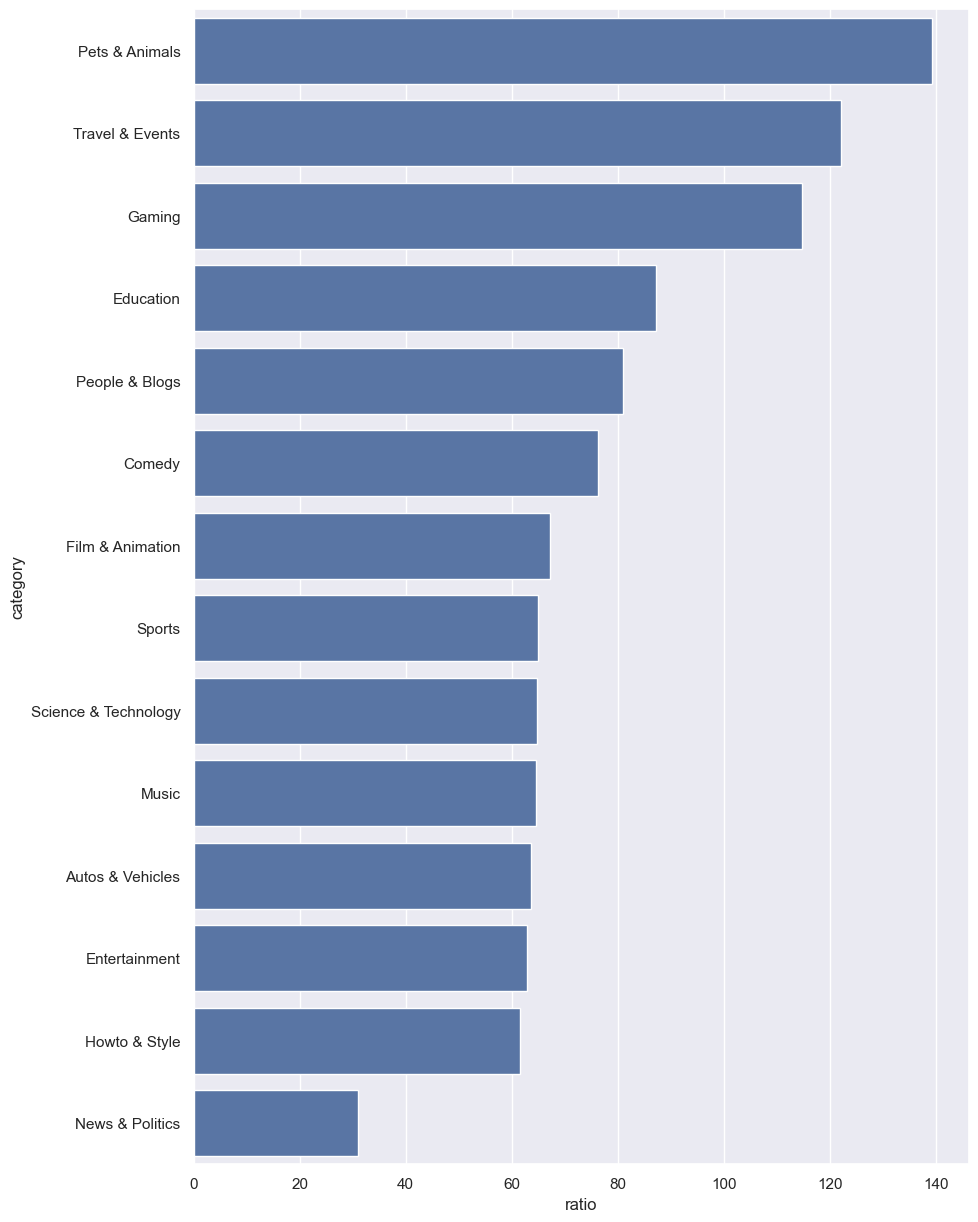

In [19]:
# calculating total likes for each category
likesdf = combined_df.groupby('category')['likes'].agg('sum')
# calculating total dislikes for each category
dislikesdf = combined_df.groupby('category')['dislikes'].agg('sum')
# calculating ratios of likes to dislikes
ratiodf = likesdf/dislikesdf 
# most liked category to appear on top
ratiodf = ratiodf.sort_values(ascending=False).reset_index()
# plotting bar chart
ratiodf.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=ratiodf,
            label="Likes-Dislikes Ratio", color="b")

## Observations:
We see that videos belonging to the pets and animals categories have the highest ratio of likes to dislikes videos among the trending categories whereas new and politics videos have the least. From this we can infer that people are less divided on the content of videos based on entertainment than compared to topics such as new, whose content can lead to a division of opinions among the user.


### Users like videos from which category more?

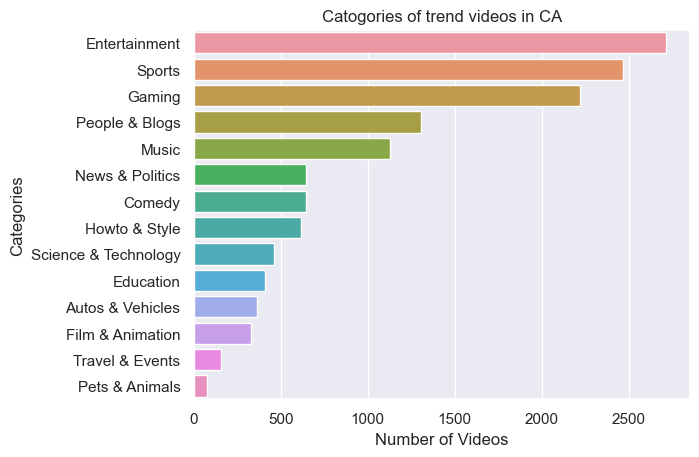

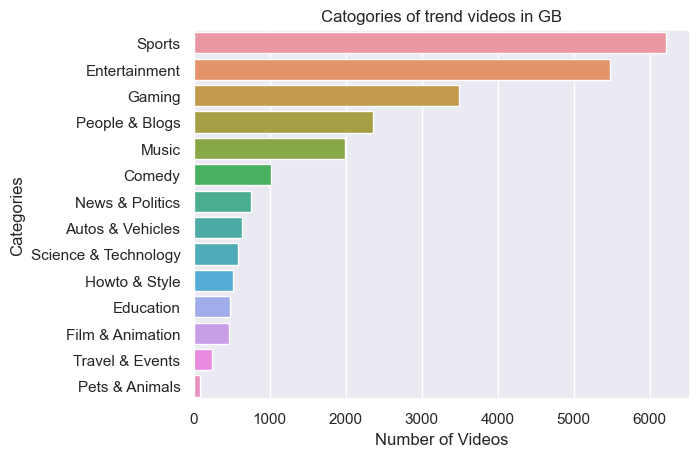

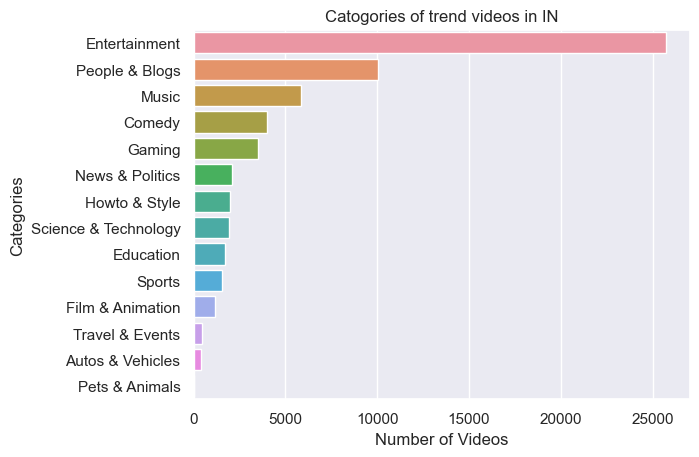

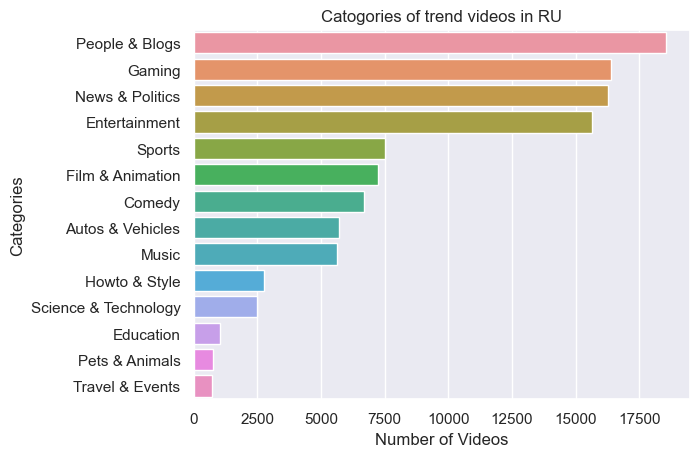

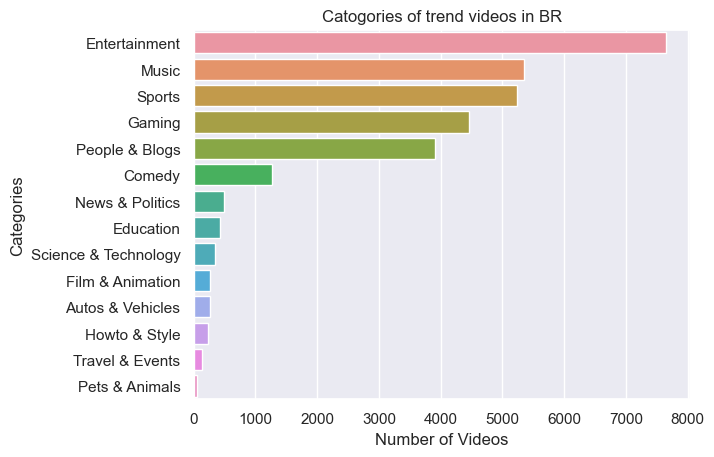

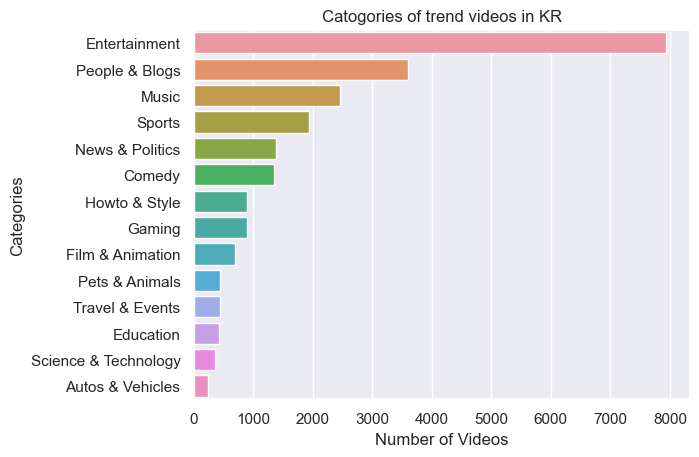

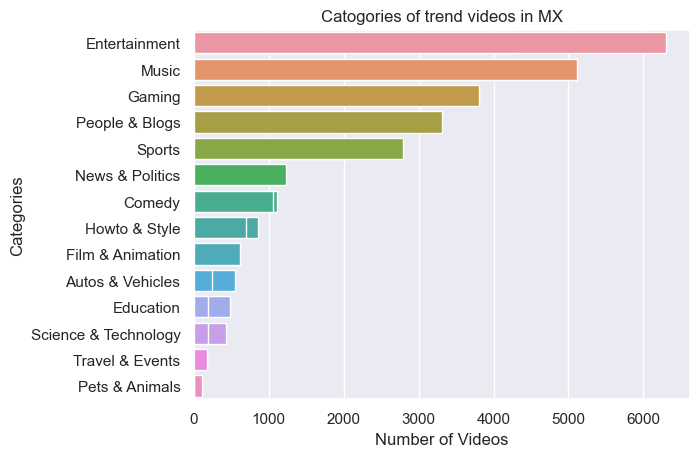

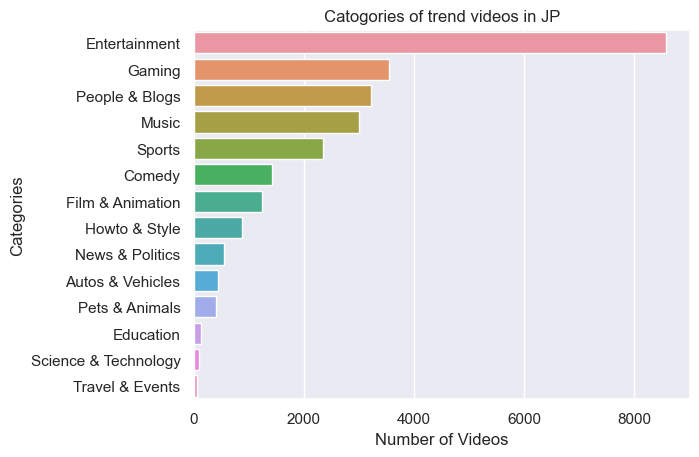

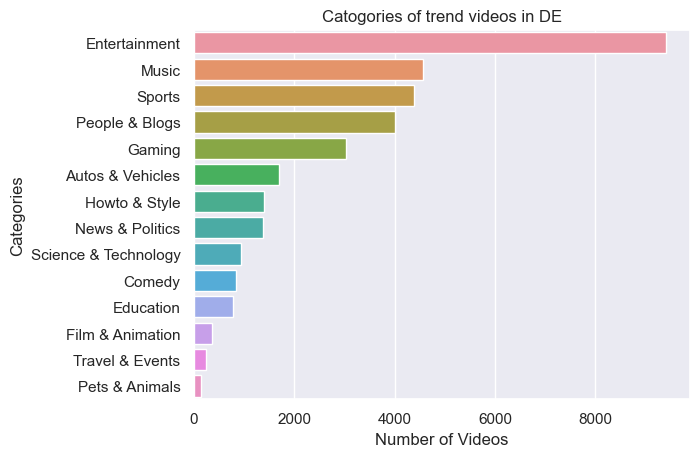

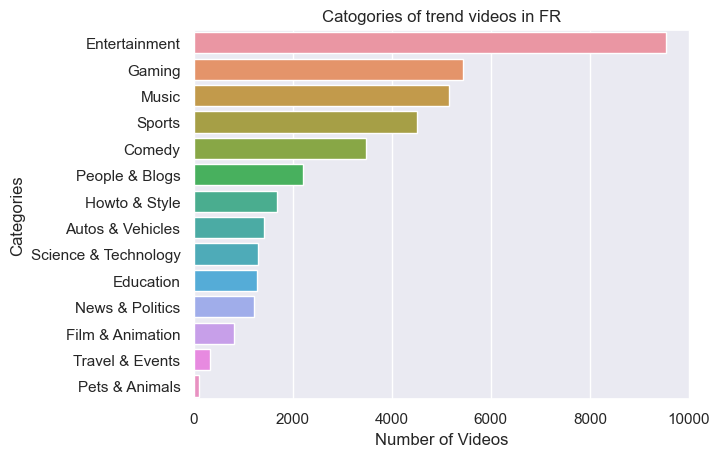

<Figure size 640x480 with 0 Axes>

In [21]:
# Getting names of all countries
countries = []
result = [i for i in glob.glob('*.{}'.format('csv'))]
for csv in result:
    c = csv[0:2]
    countries.append(c)
for country in countries:
    if country == 'US':
        tempdf = combined_df[combined_df['country']==country]['category'].value_counts().reset_index()
        ax = sns.barplot(y=tempdf['index'], x=tempdf['category'], data=tempdf, orient='h')
        plt.xlabel("Number of Videos")
        plt.ylabel("Categories")
        plt.title("Catogories of trend videos in " + country)
    else:
        tempdf = combined_df[combined_df['country']==country]['category'].value_counts().reset_index()
        ax = sns.barplot(y=tempdf['index'], x=tempdf['category'], data=tempdf, orient='h')
        plt.xlabel("Number of Videos")
        plt.ylabel("Categories")
        plt.title("Catogories of trend videos in " + country)
        plt.figure()

## Observations
Apart from RU and GB, category most liked by the users in each of the other countries is ‘Entertainment’.
Viewers from RU prefer the category ‘People and Blogs’ the most.
Viewers from GB prefer the category ‘Sports’ the most.
Categories ‘Pets & Animals’, ‘Travel & Events’ were the least liked ones in almost all of the countries.

### Top 5 videos that are on trending in each country?

In [35]:
temporary = []
for df in all_dataframes:
    temp = df
    temp = temp.reset_index().sort_values(by = ['view_count'], ascending=False)
    temp.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
    temp.set_index('video_id', inplace=True)
    temp = temp.head(5) # top 5 that are on trending
    temporary.append(temp)
# Printing 3 randomly selected countries
temporary[3][['title', 'channelTitle', 'category', 'view_count', 'likes']]

,title,channelTitle,category,view_count,likes
video_id,,,,,
gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,Music,183532509,14678180
WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,Music,166895681,14202588
gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,BLACKPINK,Music,163821398,11200127
4MjzAPYi2CM,😱OMG😱 BEST TEACHER,dednahype,Comedy,158330370,8278389
VK1pC2J57YY,Javelin Balloon Pop Racing Is INTENSE!!,How Ridiculous,Sports,150213997,6752251


In [38]:
temporary[5][['title', 'channelTitle', 'category', 'view_count', 'likes']]

,title,channelTitle,category,view_count,likes
video_id,,,,,
WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,Music,296314174,16464253
gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,BLACKPINK,Music,268758295,12882845
gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,Music,262319276,16254784
CuklIb9d3fI,BTS (방탄소년단) 'Permission to Dance' Official MV,HYBE LABELS,Music,194795844,12767906
awkkyBH2zEo,LISA - 'LALISA' M/V,BLACKPINK,Music,192376395,12177724


In [40]:
temporary[1][['title', 'channelTitle', 'category', 'view_count', 'likes']]

,title,channelTitle,category,view_count,likes
video_id,,,,,
gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,Music,208581468,15246514
gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,BLACKPINK,Music,206344829,11945462
qF0N19MgI3Q,JETSKI WAX PRANK!! 🤣 - #Shorts,Julius Dein,Entertainment,194625542,4935519
vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK,Music,176467113,11645396
WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,Music,166895681,14202526


## Observations
Users from every country mostly prefer videos belonging to the categories of ‘Music’ and ‘Entertainment’, potentially meaning users usually use the platform for recreational purposes in comparisons to other uses.

### Is the most liked video also the most trending video?

In [44]:
temporary = [] # to store results for each country
for df in all_dataframes:
    temp = df
    temp = temp.reset_index().sort_values(by = ['likes'], ascending=False)
    temp.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
    temp.set_index('video_id', inplace=True)
    temp = temp.head(5) # top 5 that are most liked
    temporary.append(temp)
# Printing 3 randomly selected results
temporary[3][['view_count', 'likes']]

,view_count,likes
video_id,,
gdZLi9oWNZg,183532509,14678180
WMweEpGlu_U,166895681,14202588
CuklIb9d3fI,119141680,11357978
gQlMMD8auMs,163821398,11200127
vRXZj0DzXIA,134856366,10751100


In [45]:
temporary[5][['view_count', 'likes']]

,view_count,likes
video_id,,
WMweEpGlu_U,296314174,16464253
gdZLi9oWNZg,262319276,16254784
gQlMMD8auMs,268758295,12882845
CuklIb9d3fI,194795844,12767906
awkkyBH2zEo,192376395,12177724


In [46]:
temporary[1][['view_count', 'likes']]

,view_count,likes
video_id,,
gdZLi9oWNZg,208581468,15246514
WMweEpGlu_U,166895681,14202526
CuklIb9d3fI,156482499,12117314
gQlMMD8auMs,206344829,11945462
vRXZj0DzXIA,176467113,11645396


## Observation
We can see that the most liked videos in different countries are also the videos with the most view count

### Users like videos from which category more?

In [51]:
temp = combined_df
temp = temp.groupby('category')['view_count', 'likes'].apply(lambda x: x.astype(int).sum())
temp = temp.sort_values(by='likes', ascending=False).head()
temp

/var/folders/hc/krdxgxxs5x36rm204m01yrbh0000gn/T/ipykernel_79050/3247470797.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = temp.groupby('category')['view_count', 'likes'].apply(lambda x: x.astype(int).sum())


,view_count,likes
category,,
Entertainment,148878011162,6775691266
Music,99798029119,4421586497
People & Blogs,62363360802,3614014403
Gaming,43388673883,2623916140
Comedy,31827947864,1910542335


## Observation
As we can see, most liked category is ‘Entertainment’ for all countries. This shows user preference to use YouTube as an entertainment platform.

### Users comment on which category the most?

In [52]:
temp = combined_df
temp = temp.groupby('category')['view_count','likes', 'comment_count'].apply(lambda x: x.astype(int).sum())
temp = temp.sort_values(by='comment_count', ascending=False).head()
temp

/var/folders/hc/krdxgxxs5x36rm204m01yrbh0000gn/T/ipykernel_79050/129098107.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = temp.groupby('category')['view_count','likes', 'comment_count'].apply(lambda x: x.astype(int).sum())


,view_count,likes,comment_count
category,,,
Music,99798029119,4421586497,369449351
Entertainment,148878011162,6775691266,315032545
People & Blogs,62363360802,3614014403,152463600
Gaming,43388673883,2623916140,134593074
Comedy,31827947864,1910542335,68406487


## Observation
As we can see, 'Music' and 'Entertainment' category videos have the highest comment_count and also likes. This shows user preference to use YouTube as an entertainment platform.

### Correlation between views, likes, dislikes, and comments

In [82]:
col = ['view_count', 'likes', 'dislikes', 'comment_count']
corr = combined_df[col].corr()
corr

,view_count,likes,dislikes,comment_count
view_count,1.000000,0.810807,0.152418,0.442557
likes,0.810807,1.000000,0.120922,0.545356
dislikes,0.152418,0.120922,1.000000,0.155743
comment_count,0.442557,0.545356,0.155743,1.000000


## Observation
When evaluating the correlation between all the variables, the correlation of each feature with itself is also included, which is always 1

We can see from the results, there is a positive relation between views and likes, likes and comment_count, dislikes and comment_count. We came to this conclusion as anytime the correlation coefficient, denoted as corr, is greater than zero, it’s a positive relationship.


# Conclusion

In conclusion, the statistics gathered and analyzed throughout this YouTube project provide valuable insights into the platform's dynamics, trends, and user behaviors. Through meticulous data collection and comprehensive analysis, we have gained a deeper understanding of the factors that contribute to a video's success, the preferences of YouTube viewers, and the strategies employed by successful content creators.